In [1]:
'''Multiclass classification based on hazelnuts variety "c_avellana, c_americana,
c_corutana and comparting with SVM, kNN, Decision tree, Naive Bayes classifiers'''

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
hazel_df = pd.read_csv("../input/hazelnuts.txt",sep="\t",header=None)
hazel_df = hazel_df.transpose()
hazel_df.columns = ["sample_id","length","width","thickness","surface_area","mass","compactness",
                    "hardness","shell_top_radius","water_content","carbohydrate_content","variety"]
hazel_df.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055074738,34.65,1375.5,0.93005,19.145,4.4604,0.048667685,0.175,c_avellana
1,72,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.78,4.7844,0.048826089,0.167,c_avellana
2,1,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.12,5.2893,0.049521325,0.174,c_americana
3,73,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167,c_avellana
4,2,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173,c_americana


In [2]:
#Feature selection
all_features = hazel_df.drop(["variety","sample_id"],axis=1) 
target_feature = hazel_df["variety"]
all_features.head()

,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content
0,11.67,12.8025,8.055074738,34.65,1375.5,0.93005,19.145,4.4604,0.048667685,0.175
1,13.86,13.0995,7.349906812,38.1,1439.55,0.93401,8.78,4.7844,0.048826089,0.167
2,20.53,15.5925,9.565426582,49.89,1623.3,0.96217,5.12,5.2893,0.049521325,0.174
3,14.13,12.222,7.182948645,35.43,1412.25,0.90178,13.694,4.8168,0.049594663,0.167
4,15.85,14.724,8.622661318,43.29,1512,0.96261,10.925,4.6296,0.050384315,0.173


In [3]:
#Dataset preprocessing
from sklearn import preprocessing
x = all_features.values.astype(float) #returns a numpy array of type float
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_features = pd.DataFrame(x_scaled)
scaled_features.head()

,0,1,2,3,4,5,6,7,8,9
0,0.150901,0.153243,0.324641,0.090652,0.142562,0.339383,0.773629,0.215165,0.000000,1.000000
1,0.274212,0.200285,0.151451,0.199245,0.268595,0.372051,0.324396,0.392418,0.003034,0.111111
2,0.649775,0.595153,0.695584,0.570349,0.630165,0.604356,0.165767,0.668636,0.016351,0.888889
3,0.289414,0.061297,0.110446,0.115203,0.214876,0.106171,0.537375,0.410143,0.017756,0.111111
4,0.386261,0.457591,0.464040,0.362606,0.411157,0.607985,0.417363,0.307730,0.032881,0.777778


The overall score for Decision Tree classifier is: 83.46


Text(0.5, 1.0, 'KNN Confusion_matrix')

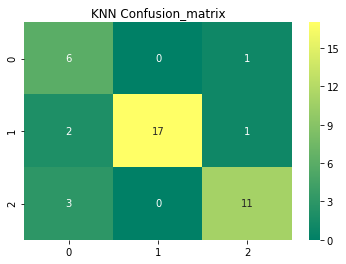

In [4]:
#Decision tree
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
import seaborn as sns

X_train,X_test,y_train,y_test = train_test_split(scaled_features,target_feature,test_size=0.2,random_state=40)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
dt_pred=model.predict(X_test)
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,scaled_features,target_feature,cv=10,scoring='accuracy')
print('The overall score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(dt_pred,y_test),annot=True,cmap='summer')
plt.title('KNN Confusion_matrix')


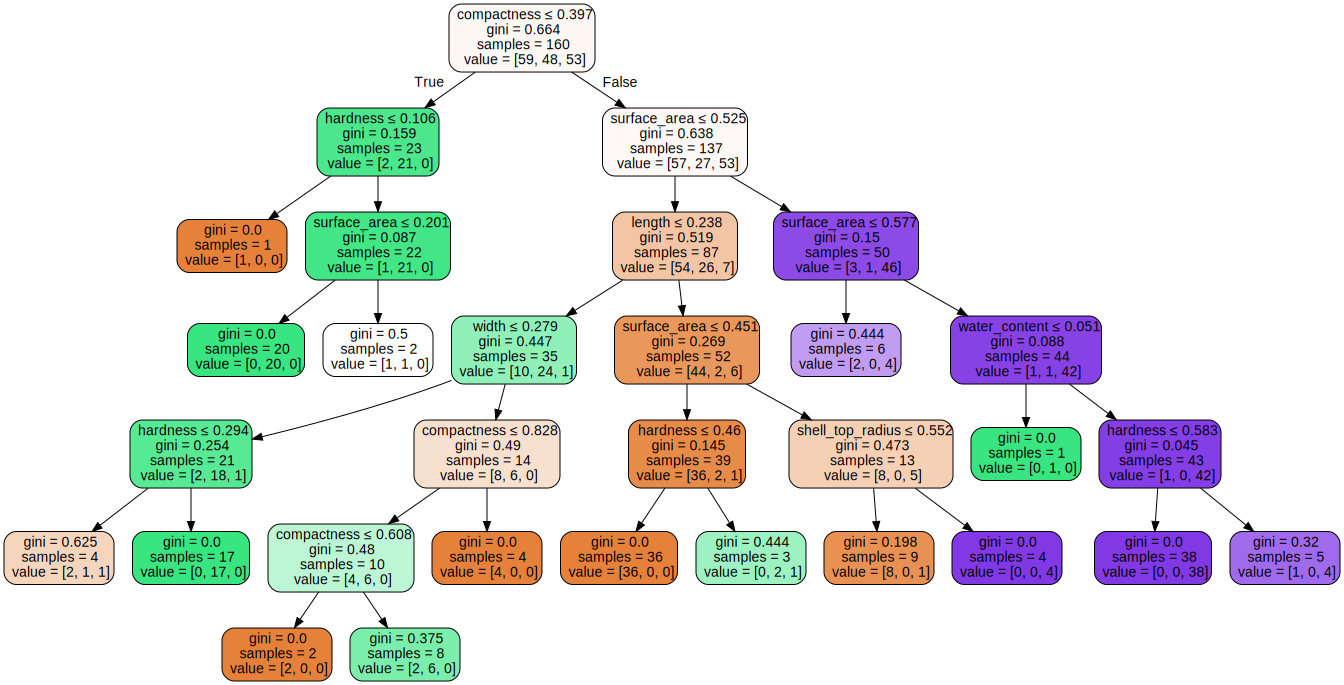

In [5]:
#Visualizing decision tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=hazel_df.columns[1:-1],
    filled=True,
    rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data) 
graph


The overall score for K Nearest Neighbors Classifier is: 89.05


Text(0.5, 1.0, 'KNN Confusion_matrix')

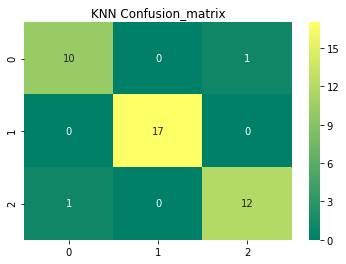

In [6]:
#KNN
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train,y_train)
dt_knn=model.predict(X_test)
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts= 
result_knn=cross_val_score(model,scaled_features,target_feature,cv=kfold,scoring='accuracy')
print('The overall score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(dt_knn,y_test),annot=True,cmap='summer')
plt.title('KNN Confusion_matrix')

Text(0, 0.5, 'Accuracy')

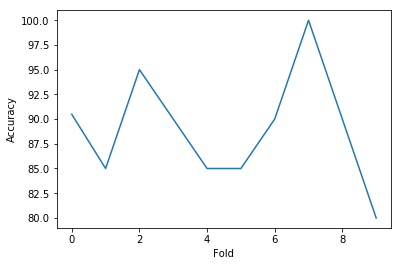

In [7]:
#KNN fold accuracy visualizer
_result_knn=[r*100 for r in result_knn]
plt.plot(_result_knn)
plt.xlabel('Fold')
plt.ylabel('Accuracy')

The overall score for Gaussian Naive Bayes classifier is: 86.14


Text(0.5, 1.0, 'Naive Bayes Confusion_matrix')

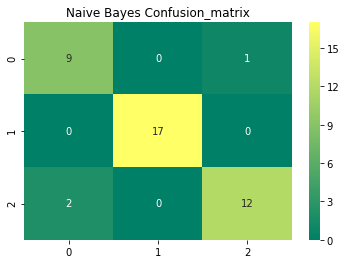

In [8]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
gnb_pred=model.predict(X_test)
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,scaled_features,target_feature,cv=10,scoring='accuracy')
print('The overall score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(gnb_pred,y_test),annot=True,cmap='summer')
plt.title('Naive Bayes Confusion_matrix')

Text(0.5, 1.0, 'Accuracy')

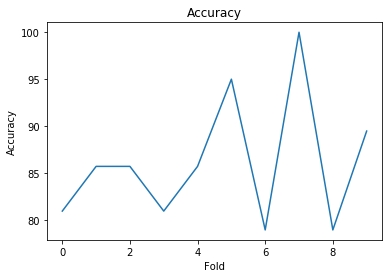

In [9]:
#Naive bayes fold accuracy visualizer
_result_gnb=[r*100 for r in result_gnb]
plt.plot(_result_gnb)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy')

In [10]:
#Naive bayes KFold tracking example
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10, random_state=None) 

for train_index, test_index in kf.split(scaled_features):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = all_features.iloc[train_index], all_features.iloc[test_index] 
    y_train, y_test = target_feature.iloc[train_index], target_feature.iloc[test_index]
    model = GaussianNB()
    model.fit(X_train,y_train)
    result_gnb=cross_val_score(model,scaled_features,target_feature,cv=10,scoring='accuracy')
    print(result_gnb.mean())



Train: [ 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200] Validation: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
0.8614160401002506
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58 

The overall score for Support Vector machine classifier is: 90.1


Text(0.5, 1.0, 'SVM Confusion_matrix')

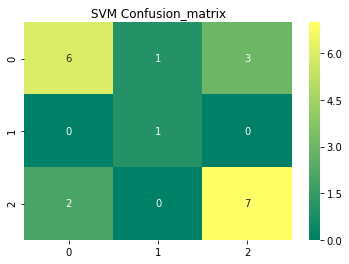

In [11]:
#Linear SVM 
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC, LinearSVC
model = SVC(gamma='auto')
model.fit(X_train,y_train)
pred_svm = model.predict(X_test)
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,scaled_features,target_feature,cv=10,scoring='accuracy')
print('The overall score for Support Vector machine classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(pred_svm,y_test),annot=True,cmap='summer')
plt.title('SVM Confusion_matrix')

Text(0, 0.5, 'Accuracy')

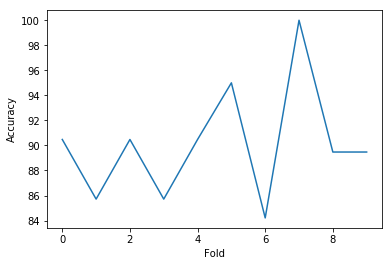

In [12]:
#SVM fold accuracy visualizer
_result_svm=[r*100 for r in result_svm]
plt.plot(_result_svm)
plt.xlabel('Fold')
plt.ylabel('Accuracy')

In [13]:
#Comparing all classifiers
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
               'Naive Bayes', 'Decision Tree'],
    'Score': [result_svm.mean(), result_knn.mean(), 
              result_gnb.mean(), result_tree.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Support Vector Machines,0.901015
1,KNN,0.890476
2,Naive Bayes,0.861416
3,Decision Tree,0.834624
